# Classificação de sobreviventes do titanic

Este jupiter notebook tem como objetivo analisar o dataset do titanic a fim de identificar quais features melhor descrevem um previsor para poder classificar se determinado indivíduo teria ou não chances de sobreviver ao naufráfio.

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable       |	Definition   |	Key     |
:--------------|:----------------|:---------|
survival |	Survival   |0 = No, 1 = Yes
pclass	 |Ticket class |1 = 1st, 2 = 2nd, 3 = 3rd
sex	|Sex|	
Age	|Age| in years	
sibsp|	# of siblings / spouses aboard the Titanic	|
parch|	# of parents / children aboard the Titanic	|
ticket|	Ticket number	|
fare	|Passenger fare	|
cabin|	Cabin number	|
embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
df['Pclass'] = df['Pclass'].astype('category')

## Análise exploratória

Vamos analisar o dataset para entender como estão distribidas as informações para assim obter insigths dos dados.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


### Idade

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [64]:
df['CategoricalAge'] = pd.cut(df.Age, bins=[0, 2, 12, 18, 65, 99], labels=['Baby', 'Child', 'Young', 'Adult', 'Elderly'])
df['CategoricalAge'] = df['CategoricalAge'].astype('category')
df['CategoricalAge']

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
886    Adult
887    Adult
888      NaN
889    Adult
890    Adult
Name: CategoricalAge, Length: 891, dtype: category
Categories (5, object): ['Baby' < 'Child' < 'Young' < 'Adult' < 'Elderly']

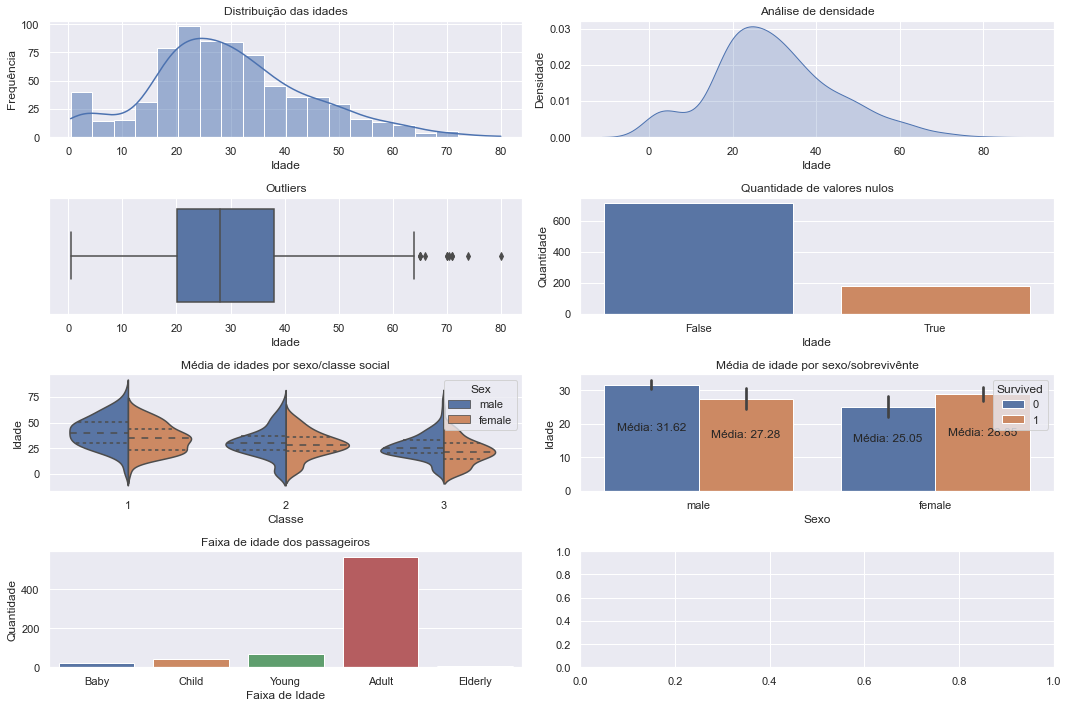

In [50]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,10))

sns.histplot(data=df, x='Age', kde=True, ax=ax[0][0]).set(title='Distribuição das idades', xlabel='Idade', ylabel='Frequência')
sns.kdeplot(data=df, x='Age', shade=True, ax=ax[0][1]).set(title='Análise de densidade', xlabel='Idade', ylabel='Densidade')
sns.boxplot(data=df, x='Age', ax=ax[1][0]).set(title='Outliers', xlabel='Idade')
sns.countplot(x=df.Age.isna(), ax=ax[1][1]).set(title='Quantidade de valores nulos', xlabel='Idade', ylabel='Quantidade')
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True,  inner='quartile', ax=ax[2][0]) \
    .set(title='Média de idades por sexo/classe social', xlabel='Classe', ylabel='Idade')

sns.barplot(y='Age', x='Sex', hue='Survived', data=df, ax=ax[2][1]).set(title='Média de idade por sexo/sobrevivênte', xlabel='Sexo', ylabel='Idade')
for p in ax[2][1].patches:
    ax[2][1].annotate(f'Média: {p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x='CategoricalAge', ax=ax[3][0]).set(title='Faixa de idade dos passageiros', xlabel='Faixa de Idade', ylabel='Quantidade')

plt.tight_layout()
plt.show()

### Classe

In [7]:
df['Pclass'].describe()

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64

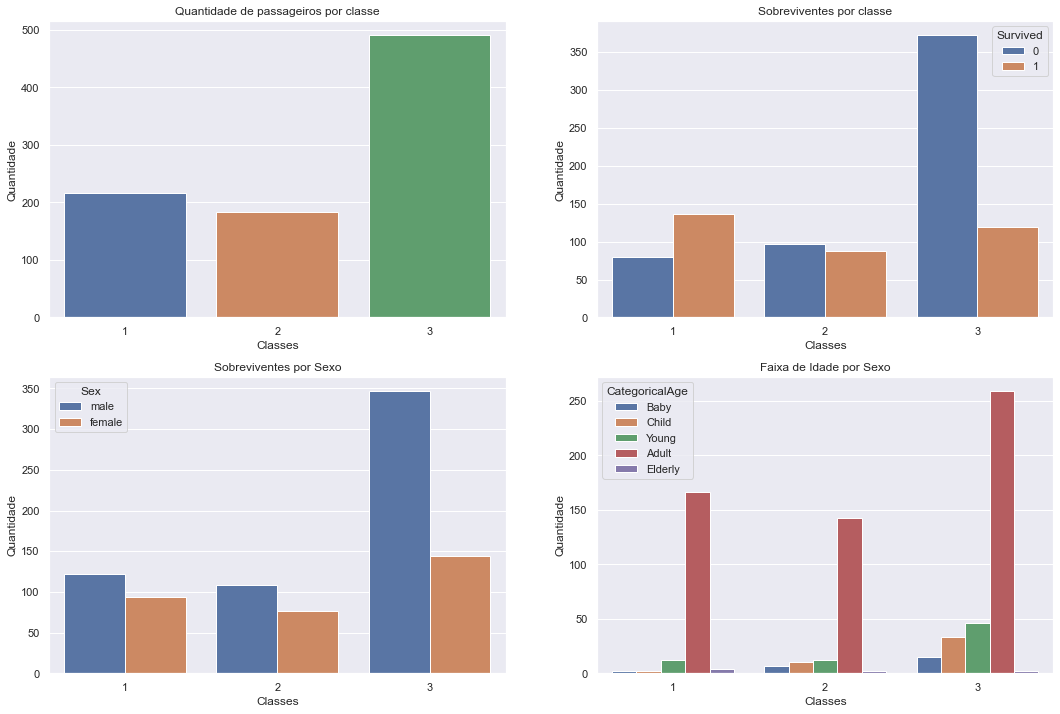

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

sns.countplot(x='Pclass', data=df, ax=ax[0][0]).set(title='Quantidade de passageiros por classe', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[0][1]).set(title='Sobreviventes por classe', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='Sex', data=df, ax=ax[1][0]).set(title='Sobreviventes por Sexo', xlabel='Classes', ylabel='Quantidade')
sns.countplot(x='Pclass', hue='CategoricalAge', data=df, ax=ax[1][1]).set(title='Faixa de Idade por Sexo', xlabel='Classes', ylabel='Quantidade')

plt.show()

### Name, Family

In [124]:
df['Surname'] = np.array(df['Name'].str.split(',').tolist())[:, 0]

In [137]:
df['Surname'].describe()

count           891
unique          667
top       Andersson
freq              9
Name: Surname, dtype: object

In [158]:
family = df.groupby(['Surname']).agg(Quantity=('Name', len), Names=('Name', ' '.join)).sort_values('Quantity', ascending=False)
family[family['Quantity'] > 1]

,Quantity,Names
Surname,,
Andersson,9,"Andersson, Mr. Anders Johan Andersson, Miss. E..."
Sage,7,"Sage, Master. Thomas Henry Sage, Miss. Constan..."
Skoog,6,"Skoog, Master. Harald Skoog, Mrs. William (Ann..."
Carter,6,"Carter, Rev. Ernest Courtenay Carter, Mr. Will..."
Goodwin,6,"Goodwin, Master. William Frederick Goodwin, Mi..."
...,...,...
Zabour,2,"Zabour, Miss. Hileni Zabour, Miss. Thamine"
White,2,"White, Mr. Richard Frasar White, Mr. Percival ..."
McCoy,2,"McCoy, Mr. Bernard McCoy, Miss. Agnes"


In [162]:
df.loc[(df['SibSp'] > 0) | (df['Parch'] > 0)][['Surname', 'SibSp', 'Parch']]

,Surname,SibSp,Parch
0,Braund,1,0
1,Cumings,1,0
3,Futrelle,1,0
7,Palsson,3,1
8,Johnson,0,2
...,...,...,...
874,Abelson,1,0
879,Potter,0,1
880,Shelley,0,1
885,Rice,0,5


In [167]:
df[df['Surname'] == 'Palsson']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,CategoricalAge,Surname
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,Child,Baby,Palsson
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,Child,Child,Palsson
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S,Child,Child,Palsson
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,Adult,Adult,Palsson


In [176]:
df['FamilySize'] = df['Surname'].apply(lambda x: family.loc[x].Quantity)

In [177]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,CategoricalAge,Surname,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Adult,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Adult,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Adult,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Adult,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Adult,Allen,2
